In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date
from datetime import timedelta

In [25]:
def simfishcounts(x,r=0):
    lunarT = 29.5
    yearT = 365

    # parameters to simulate periodic fish counts for a species
    o1,p1,a1 = -16,8,500
    lo1,lp1,la1 = 1,6,100

    # create counts
    basefish = 20 # minimum num of fish
    fish1 = a1*np.sin(np.pi*(x - o1)/yearT) ** p1 + la1*np.sin(np.pi*(x - lo1)/lunarT) ** lp1
    allfish = fish1 + basefish

    # random perturbation
    rand = np.random.normal(0,r,allfish.size)
    allfish = allfish + rand

    # ensure no negative fish
    allfish[allfish < 0] = 0
    return allfish

### Generate Simulated Data from 2000-2021

[datetime.date(2000, 1, 1), datetime.date(2000, 1, 2), datetime.date(2000, 1, 3), datetime.date(2000, 1, 4), datetime.date(2000, 1, 5), datetime.date(2000, 1, 6), datetime.date(2000, 1, 7), datetime.date(2000, 1, 8), datetime.date(2000, 1, 9), datetime.date(2000, 1, 10), datetime.date(2000, 1, 11), datetime.date(2000, 1, 12), datetime.date(2000, 1, 13), datetime.date(2000, 1, 14), datetime.date(2000, 1, 15), datetime.date(2000, 1, 16), datetime.date(2000, 1, 17), datetime.date(2000, 1, 18), datetime.date(2000, 1, 19), datetime.date(2000, 1, 20), datetime.date(2000, 1, 21), datetime.date(2000, 1, 22), datetime.date(2000, 1, 23), datetime.date(2000, 1, 24), datetime.date(2000, 1, 25), datetime.date(2000, 1, 26), datetime.date(2000, 1, 27), datetime.date(2000, 1, 28), datetime.date(2000, 1, 29), datetime.date(2000, 1, 30), datetime.date(2000, 1, 31), datetime.date(2000, 2, 1), datetime.date(2000, 2, 2), datetime.date(2000, 2, 3), datetime.date(2000, 2, 4), datetime.date(2000, 2, 5), datet

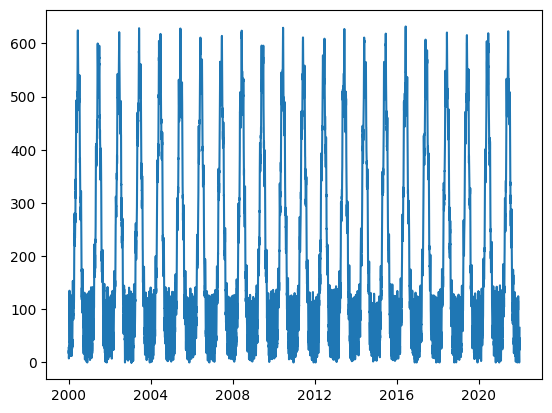

(2, 8036)


In [26]:
# getting x axis of days over time
dayofyear = np.arange(0,366,1)
totaldays = 0
dayofyears = []
for yr in range(2000,2022):
    if (yr - 2000) % 4 == 0:
        totaldays += 366
        dayofyears.append(dayofyear)
    else:
        totaldays += 365
        dayofyears.append(dayofyear[:-1])
dayofyear = np.concatenate(dayofyears)
x = np.arange(0,totaldays,1)
day = []
for i in range(len(x)):
    d = x[i].item()
    day.append(date(2000,1,1) + timedelta(days=d))
print(day)

# generate counts
r = 10
allfish = simfishcounts(x,r)

# plot
x = np.linspace(0,30,70)
eq = 0.1*np.cos(2*np.pi*(x+1)/29.5) ** 22
fig,ax = plt.subplots(1,1)
ax.plot(day,allfish)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.show()

# save
data = np.stack((allfish,dayofyear))
print(data.shape)
np.savetxt("simcounts.csv",data,delimiter=',',fmt='%i')

### Generate Simulated Test Data from 2022-2023

[datetime.date(2022, 1, 1), datetime.date(2022, 1, 2), datetime.date(2022, 1, 3), datetime.date(2022, 1, 4), datetime.date(2022, 1, 5), datetime.date(2022, 1, 6), datetime.date(2022, 1, 7), datetime.date(2022, 1, 8), datetime.date(2022, 1, 9), datetime.date(2022, 1, 10), datetime.date(2022, 1, 11), datetime.date(2022, 1, 12), datetime.date(2022, 1, 13), datetime.date(2022, 1, 14), datetime.date(2022, 1, 15), datetime.date(2022, 1, 16), datetime.date(2022, 1, 17), datetime.date(2022, 1, 18), datetime.date(2022, 1, 19), datetime.date(2022, 1, 20), datetime.date(2022, 1, 21), datetime.date(2022, 1, 22), datetime.date(2022, 1, 23), datetime.date(2022, 1, 24), datetime.date(2022, 1, 25), datetime.date(2022, 1, 26), datetime.date(2022, 1, 27), datetime.date(2022, 1, 28), datetime.date(2022, 1, 29), datetime.date(2022, 1, 30), datetime.date(2022, 1, 31), datetime.date(2022, 2, 1), datetime.date(2022, 2, 2), datetime.date(2022, 2, 3), datetime.date(2022, 2, 4), datetime.date(2022, 2, 5), datet

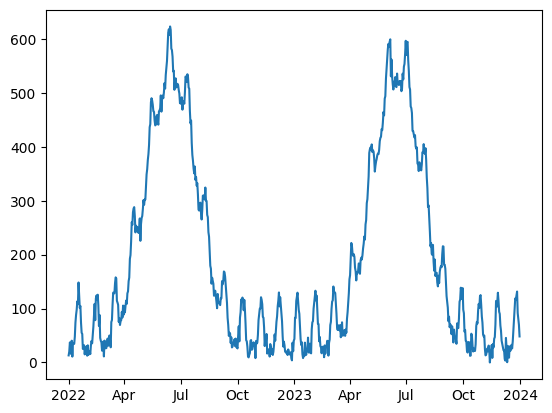

(2, 730)


In [27]:
# getting x axis of days over time
totaldays = 365 + 365
dayofyear = np.arange(0,366,1)
dayofyear = np.concatenate((dayofyear[:-1],dayofyear[:-1]))
x = np.arange(0,totaldays,1)
day = []
for i in range(len(x)):
    d = x[i].item()
    day.append(date(2022,1,1) + timedelta(days=d))
print(day)

# generate counts
allfish = simfishcounts(x,r)

# plot
fig,ax = plt.subplots(1,1)
ax.plot(day,allfish)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.show()

# save
data = np.stack((allfish,dayofyear))
print(data.shape)
np.savetxt("simcountstest.csv",data,delimiter=',',fmt='%i')